In [1]:
import utils
import ecc
import encrypt as encrypt
from ecc import key_length, public_key

[226 226 223 223 226 226 228 227 227 225 228 225 223 226 223 221 221 221
 222 222 223 223 224 221 218 221 223 225 221 221 220 223]
[226, 226, 223, 223, 226, 226, 228, 227, 227, 225, 228, 225, 223, 226, 223, 221, 221, 221, 222, 222, 223, 223, 224, 221, 218, 221, 223, 225, 221, 221, 220, 223] ['1110001011100010110111111101111111100010111000101110010011100011111000111110000111100100111000011101111111100010110111111101110111011101110111011101111011011110110111111101111111100000110111011101101011011101110111111110000111011101110111011101110011011111']
Point(curve=Curve(p=115792089237316195423570985008687907853269984665640564039457584007908834671663, a=0, b=7), x=102623556341855476438120775075134367828819245755537249008606767183051412593887, y=102165963657212015985066038583517600282816772391186532982357338541032492153774)
Point(curve=Curve(p=115792089237316195423570985008687907853269984665640564039457584007908834671663, a=0, b=7), x=68436035171625280240330579668501513586933974621536120490695

In [2]:
# encrypted_image = encrypt.encrypt_image('doge.png')
# print(encrypted_image)

In [3]:
# from matplotlib import pyplot as plt
# plt.imshow(encrypted_image, interpolation='nearest')
# plt.show()
# plt.savefig('enc.png')

In [4]:
import numpy as np
random_key = 18398800208287441760983961865782355938679551141855098527665653562118439265414
private_key = 3
from ecc import G 
from ecc import bitcoin_curve as BC 

def group_pixels(channel, key_length):
  members = key_length//8 - 1
  group_length = 0
  b = []
  grp = ""
  found = []
  for i in range(len(channel)):
    group_length+=1
    found.append(channel[i])
    grp+=utils.get_bin(channel[i], 8)
    if group_length==32:
        if (i==31):
            print(found, grp, int(grp, 2))
        b.append(int(grp, 2))
        found = []
        grp = ""
        group_length = 0

  return b

def make_points_and_decrypt(grouped_pixels, public_key):

  keyG = random_key*G
  keyPv = private_key*keyG
#   print('keyPv', keyPv)

  PC = []
  for i in range(0, len(grouped_pixels), 2):
    x = grouped_pixels[i]
    print(grouped_pixels[i+1])
    y = BC.p - grouped_pixels[i+1]
    point = ecc.Point(ecc.bitcoin_curve, x, y)
    if (i<3):
      print(point)
    point = point + keyPv
    if (i<3):
      print(point)
    PC.append(point)

  return PC

def get_channel_for_cipher_image(PC, width):
  pixel_values = []
  for point in PC:
    x, y = point.x, point.y
    bins = utils.get_bin(x, 256)
    nums = [int(bins[i:i+8], 2) for i in range(0, len(bins), 8)]
    pixel_values.append(nums)
    # print(nums, bins)
    # print(len(nums), len(bins))
    bins = utils.get_bin(y, 256)
    nums = [int(bins[i:i+8], 2) for i in range(0, len(bins), 8)]
    pixel_values.append(nums)
    # print(nums, bins)
    # print(len(nums), len(bins))
    # print(pixel_values)

  for i in pixel_values:
    while (len(i)!=32):
      i.append(0)

  # print(len(pixel_values))
  pixel_values = np.asarray(pixel_values).flatten().reshape(width, -1)
  # print(pixel_values.shape)
  # print(pixel_values)

  return(pixel_values)


def decrypt_image(filepath):
  image, channels, length, width = encrypt.load_image(filepath)
#   print(image, channels, length, width)
  pixels_list = encrypt.extract_channels(image, channels)
  print(pixels_list[0][:32])

  original_channels = []

  for channel_pixel in pixels_list:
    grouped_pixels = group_pixels(channel_pixel, key_length)
    print(len(grouped_pixels))
    secret_points = make_points_and_decrypt(grouped_pixels, public_key)
#     print(secret_points)
    sec_channel = get_channel_for_cipher_image(secret_points, width)
#     print(sec_channel[:200])
    original_channels.append(sec_channel)

  return np.dstack((tuple(original_channels)))


decrypted_image = decrypt_image('enc.png')

# print(decrypted_image)

[151  77 108  89 223  94  64   0  84  51 108  67  43  42 217  14 114  42
 234 158 182  60  84 208 154 105  88  40 212  66  17  39]
[151, 77, 108, 89, 223, 94, 64, 0, 84, 51, 108, 67, 43, 42, 217, 14, 114, 42, 234, 158, 182, 60, 84, 208, 154, 105, 88, 40, 212, 66, 17, 39] 1001011101001101011011000101100111011111010111100100000000000000010101000011001101101100010000110010101100101010110110010000111001110010001010101110101010011110101101100011110001010100110100001001101001101001010110000010100011010100010000100001000100100111 68436035171625280240330579668501513586933974621536120490695557583438182748455
8192
24408903061688874449785756237821557090321377836299074313736527138662219452212
Point(curve=Curve(p=115792089237316195423570985008687907853269984665640564039457584007908834671663, a=0, b=7), x=68436035171625280240330579668501513586933974621536120490695557583438182748455, y=91383186175627320973785228770866350762948606829341489725721056869246615219451)
Point(curve=Curve(p=11579208923731619

80461650593036133249632490131319423620194407884839427335427363359222989003482
43199248979154027018093883797505356488649741236526598028354282058108639728956
3752311864134254523960709235410193540966296734443614577842727390379460334925
87273340149543945204172539729651012333506406355501005330211625561807383897743
14262841673894451289902184738771205363109199158332094954806677033821388494345
3613021256686607350090790675409208142621519286423800268884228198693360095115
84258977364545956741389799517028621110650914401950824860876369935042287098294
43366431152461115485415537477815993201336566077171649856529151663589234050204
93938377663107969010115345448924822867232534165403943522381541407617219829887
34230819065314883590545976976679530122309223144382124180317245482779912296405
90008668402873886303540566317596196783845874204968612537969577067631462030287
45873019176417065750239605673038270921328819093887781422593450467197373529723
195555397767601841104783604616550350027717268834736743007581241469

77046521238132060851747135915513047590096780220238802168951478155636044445182
70449500436186983838253044999556773313009225066662155244753414728660356623439
11059583136116445836426285022425960139602019798401941482147693956700754398400
49823469425220988536081364944106018605421378658757835168523681514934793854938
107409204715359824723528616457104260974869950057610826068932769870471200787319
34601413774204454236874493242139833845946585383296432982536200471805785345360
96453086118333512165220055632135807016716874254322741268486895245315044645400
51226964454362122471232009700100832321022830206904853209934354685887111508601
42433031131582255256436216199309966829921745069529970336533476006485231386572
70894876050502436313547666655182832822653911066230059792858255202455306481350
113759839336072577443305687511115303630455918845984823890039432316552840449849
23257494598849226969878879788807551553641844860860181488000552444527761418158
41336457099958679329661054494738072201419338929133466355416003

6351515871640123694638092544139737753267047054232797100982539645417686179419
84019615524900823861240675911619054362125258950598784921072408618250240240689
64286318727058135235736739711679573676316557780534570751673749963393355469821
65372887125551693093015135347743650243483314968867362203057678291508721259527
63143506507426507079956041513251189415308494496019696958871280634713522836607
171606928023661376548007956977309647122539229152789976422392605766830683533
62283689754597064046198455474261526896230740437963815429529935416998726319295
9028333016170547044438818659039392127998809737497775245136545421150683096709
56006373603424892627530571340024052349251517264923543180447675824196247564013
88852110208436925933096283214223046220559425786188472796645146199551056817670
36314793290689551903222423055733747310362321009713871597684380998844433106184
26738983799624000334156077194104749475691564120109213118730508805720540682298
10983455849569299015566733427262328126048653508385503814273940245086

33262754576314994562723902172001993909520299241105567239056131210434252085635
22709754554849447187238114479473478080540300472928550544763758237809020956947
89225911922349034500414343685220108412091414657414668413240720499887275286119
115332662493055789930834383083519733955824733999740171528975847323539090462408
77860222878872376210936757057423982804792079521681306154491456365057816044153
70405717482017579222791701054528892410380548745580921193297168282871507670740
87488585245530036255655481299108205519468980375193267962098737909210284407865
54116622934043434460355375516696780160986278442492047508764516471653064436315
3917506834797374980078299434307763490332761493957075770565261613821894598044
51589225528254499855710831407614830226515649083240038462338459957150200365609
102036891073360419734948581928544050233548567988813478054698535241295179812
40669396317204507694107958942202230764182542591552507858885764723981967597399
267232561189837237450972535924456977104926276950991382867671584758

72646364146056030928770646169043394224250282788198480115988758984846654765931
35694485458008062693316958059431553606520442864459661866803331324483058920880
62846042810183716980625420008712285751192674024489042158548989773196176054338
62669015426741166767770734988003912536323088228962069612644161887583503167468
51743381805310258078817466199228862695362250138531348778830755312309855635561
58907443627976258057694420701518203061909161791536652027191915176615929288717
13398655354885043500130323820103328704387814557696389079574177702997356676908
61276785333989364124627640623618660106200772321812808291016726246032913766135
61171172952125917366952042109582844571178518093515294926849739882657477362733
61818911332830042354124286918003278557378752003394875444444585279505037111940
37278158140650535954064934950900295956196418180357258194533075991683227055520
90078400786384221930479195860837146959213561161892801733534225093607472545825
2758009907603543056321612343398748536068641149080981839478375732

8192
106028893696773904378526599315221434813118801977695407012635915808667488648020
Point(curve=Curve(p=115792089237316195423570985008687907853269984665640564039457584007908834671663, a=0, b=7), x=32543800426683018185742332867512572080355286152906820506282752815472187187886, y=9763195540542291045044385693466473040151182687945157026821668199241346023643)
Point(curve=Curve(p=115792089237316195423570985008687907853269984665640564039457584007908834671663, a=0, b=7), x=62209867524170777274286320211290071596563265962472910100619817124057474760579, y=58110712883369880555007395815548736767798645024888325603868944363800553694693)
99676582507938315232380168673350434942220454686994936115951688819373987133639
Point(curve=Curve(p=115792089237316195423570985008687907853269984665640564039457584007908834671663, a=0, b=7), x=77935420612309550043904131665029855870366881473065627218014167063132626872087, y=16115506729377880191190816335337472911049529978645627923505895188534847538024)
Point(curve=Curve(p=

29207752167727904754450634668336948769503311755349389920329814656245062112156
11370149998004374260307164142958892096345100808030233994358277896095882373734
88056936477930396252443197616083394179242519069896794331031358356611122755577
47486266507154734069499454591372794192449249288818129559766964913857119960933
70132143056572238767208502393065593334983535306694532776017956841806728415057
81775711296931806725492666946680157084799320215692334122406252068798956615021
13201722600115322068979371401998073592440989352658544043939361259766707999130
85279583028008146422912769698177807532448842313926740026210632639673574466248
33528290033790048152565366193901900009127452579302081699444746076448331139063
88432569936134255438342959247341387353150224071442665395448973955759167090939
7539647652265542812060777596073245570341491069012461810604219939344719365412
85983281668155337204712875311242385765713370979641698399337924767153464117346
75932299741557064911626513859264819367145587934195200671227308586

40032541722793863429743090008689750826569521146408940902290933940005946292050
58180036628349516220407726287843113010499354169818004368384333063231725834038
6090811152466020745957803111135271456810581528962868994567193949195210338230
14353704061284591817276609380032752807518258893223722410367452781664311658663
57656255941617120234978120950774196996472746818201673631596132873160570915877
1246979180626795431941192531382917241984774457869137620411975472020106794985
107849373314925559043631729141848971380110434970250476759618165896902400498373
13131922319102526654390269968318454526368994365902476163980036592562979934319
35608345794543345955230476934388159960439296498338807052956426028917014217298
92252516859837268124067096765998290705867568791547796125359845461237662180886
34422440785279621923497732279556760297149980413387058325224699373852496521064
55091361456114923289653912326438039220020346316064727981870880547424790675596
68855408644457055579021688688906484458042199579955291087604502217

80286122849645191382641569472180290908927131117597307755565807450318415801597
6597664243994707140109910564103663979552130085925659910058811989082327061120
45420233727110857418191425758910777467655558307302817600208052806781759447176
95705828418876105097917340824786309408180709336500093369953570546184587897182
16776299015286622547037565278334390293643529462127413403991349580679570107113
97444444361337896249723274344798979944056147838598342951317513943426489575957
38756744972036067831445433399180955945938348312793100769576690075332395969129
31247338009217968904806157473482737976285595053961570571442397266954568994559
95349148591859921737089998383656865661069557201832108935255550374102642815431
43451706913138698445596331213903525120985603496812440591576043733919306410286
41921568350193709124630031345882636635444530937831392439789856447582538686492
90170189469681670134530355050233220726685561469683960827193762862133312482627
98976274804434149564130384106048157800445688409229913168893979294

80560063367481914032658661764700374242187526295658032462410654570699310128581
42563295403361387730031491435300056608026042109627478518122504576291709581636
38181738732178405082346850573461232577531299478873810227019051714188539039926
81944382732165619450644833728436861578398280387041222024339963383838076132313
104844783197570942540143958531724732217048232544421661101421582164948014295758
80161121992947257489698463592950677956985657721368053673500175555332575413670
33292874408041093084223773901211083484463400905341023423242724882201778231299
17395845060389822009702293349256475424709208660377909389792229099870638839040
31978948178060718619431356123970976236328678070909185475891028203289234403567
114333340443511865374451810477421710669966544211682935519874631661551235853100
36331563768155574918762610508689642083934420002838555699083492630796860032311
87797660543900927581710115055988742454021400385974951567725197934596311271441
13625668011927295071763152771158247417025703769875016041449580

8192
53762756700113180473349058852940281858914058935428098494441437238489872979898
Point(curve=Curve(p=115792089237316195423570985008687907853269984665640564039457584007908834671663, a=0, b=7), x=37233402286563207557499615141222630583430901342410632136203586280317920321994, y=62029332537203014950221926155747625994355925730212465545016146769418961691765)
Point(curve=Curve(p=115792089237316195423570985008687907853269984665640564039457584007908834671663, a=0, b=7), x=56760883351828286195383767368281258464715915209042211857077844909182724045165, y=69010544617106505132403932217930967015309012224500555220142227739087210846675)
18215915842457815601261557393930283268424579481958240187003848130135079800384
Point(curve=Curve(p=115792089237316195423570985008687907853269984665640564039457584007908834671663, a=0, b=7), x=110297255550583998354748410984617119469069871583692656551741128186489907961396, y=97576173394858379822309427614757624584845405183682323852453735877773754871279)
Point(curve=Curve(p

22758583809333567625521941426423295382269056396359791948593616138200775121031
100314486479258363503198187234181013063537841439161348094477817219153261667040
107370851198601915234953986410730823879086614003524561356951632027977024153877
35101586519434007115535513692308690698391896107813796015409761464284128223369
90501893202560528129394025722304781821475587382549353729293648680824009083639
55029313521877462352569125190680783093151156353105583489247471019997059958117
67046511749360284764726536567539405063121318815877892352251771828843363920915
74632138549354057433372432137927513785746942822325909063467719363403144317189
81290996474489379186826852041878165691548962258794110302577526445952880653792
103789697330544695923721553488603164032511663224746102659904317260697373965488
57063447742520223678401338674496238138251516415908722366490961724425834205417
48017921034196073285378956008806329774511061659389014503102860170852705696919
6204668532509562521112550353907867191875379946217093983243592

85687079167539374118635591875274456082449009310906161410465564652332311124072
5360978169653082705767153169273815787808455964278781253334193935722424640206
85646786899037782245470902889123287588763201319392634369120279154192837756538
105236977327479061563767194543390881093539392086492572142778557383921234780898
8578136671350919022972123740457715616154010146352710321810701503008063596157
15047896088707461673763538407771036909298430093705254188517809566260655140797
11673452088802060086096422867614451746929937055444049147269534838714395138967
76074505992349929541095162105239927636815150287068526736139383111686515688842
56152512523604724673769410800231816303017423930370497258989420352566641155365
35946305414610051801452327619777525874584900628609590573471239864654174872991
85650246241563605950017055483869949123818791375700786264473790384344801685609
12747632231795009786865087181651490995341409952850611547133220266829278966571
18818933958753406310405770686578325028832330552635972771821472880

22690521820919412144778574857868894733383841578750968248391983028813219517525
30147326256946474898934606255138804144992175901247360016639512065660409968509
44585039753474108107037600184700479758982683080186338466435660888677289200742
80266850305384220450702039859934156377145398952650183885258087802100220170987
77473003033443819006945854276970713946870678373004465936013179827037436715398
68882373282935399251456253713870090013999274271172940766806925054702782857714
38309646807653482954590158510047343887205816325732275140863640013664428645729
31473637026555898383630856530108972318704150750701298034090646562214560996427
81156956359755796927590461712404566878289655156351403744969551249199422619258
51970912037798922533281406968483945074709592243398099088403725729855741772490
36625422042495369824746951804280283419358918287190760110148279858426213809405
29866639002523480007078993560790203486191781534638789474987646299867456979975
4147620066837451495548520507272311814321214229686986555946017616

36617623553342484642900476982486002413118929820021076777752574482261543975214
48748721293625406489002159329102303727391062341250779415556301873691413303260
36610305705928342641919710794588060131974232172286788673552315686026883208374
80608132835488172901035205663770068229221243535614225845995786518693403478192
49234479145524061469552000121771186127081899275451012179458506323300837978238
84807504217029974680956574744710375998814971482541483542179488146947718867657
90864629446065196533723387757797700311600105704424955195847265044883929024579
114461840555384104549270895444064861613919442561769872609399225108071648413274
72404270326905750178941943670416128744628946961589561067560958420250057969685
71217018351963767172767222141373686229253411586717208491081410470518546990754
45384731950116488651782553412396445414727791423248283506049167472032358379040
78760438428549423858729499589579108899008891308292373532082103341959716769050
699208987204081547848710346470500649102186249280955267729129004

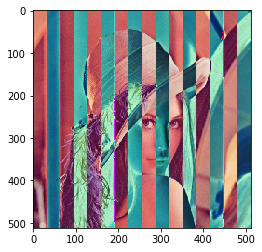

In [5]:
from matplotlib import pyplot as plt
plt.imshow(decrypted_image, interpolation='nearest')
plt.show()
from PIL import Image
im = Image.fromarray((decrypted_image).astype(np.uint8))
im.save('dec.png')

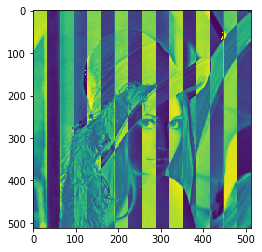

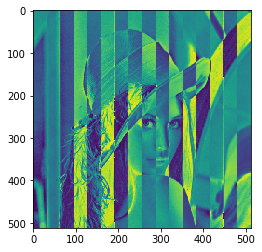

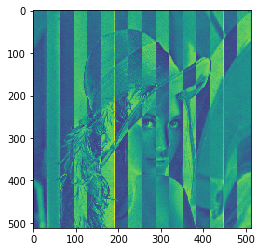

In [6]:
image, channels, length, width = encrypt.load_image('dec.png')
pixels_list = encrypt.extract_channels(image, channels)
for i in pixels_list:
    i = i.reshape(512, 512)
    plt.imshow(i, interpolation='nearest')
    plt.show()

In [7]:
image, channels, length, width = encrypt.load_image('dec.png')
pixels_list = encrypt.extract_channels(image, channels)
decc = pixels_list[0][:320]

In [8]:
org = [226, 226, 223, 223, 226, 226, 228, 227, 227, 225, 228, 225, 223, 226, 223, 221, 221, 221, 222, 222, 223, 223, 224, 221, 218, 221, 223, 225, 221, 221, 220, 223, 225, 223, 226, 223, 225, 227, 229, 231, 231, 232, 230, 233, 234, 237, 233, 231, 237, 238, 234, 235, 234, 232, 233, 230, 227, 221, 219, 213, 203, 202, 187, 174, 169, 166, 158, 153, 155, 157, 166, 161, 166, 165, 169, 170, 174, 174, 175, 180, 177, 178, 177, 177, 175, 175, 173, 179, 177, 178, 177, 178, 182, 178, 178, 179, 176, 179, 178, 174, 173, 174, 179, 180, 177, 182, 182, 185, 187, 190, 194, 194, 190, 199, 195, 193, 195, 196, 192, 201, 203, 202, 206, 197, 201, 205, 202, 206, 205, 207, 209, 203, 204, 205, 202, 204, 200, 206, 204, 206, 207, 204, 203, 206, 205, 207, 203, 201, 202, 203, 204, 202, 205, 201, 204, 202, 205, 207, 206, 206, 206, 212, 210, 205, 207, 208, 207, 210, 210, 210, 214, 209, 211, 210, 208, 211, 209, 210, 204, 209, 207, 206, 204, 210, 208, 208, 206, 209, 203, 206, 204, 207, 206, 207, 208, 207, 211, 211, 211, 207, 208, 208, 204, 208, 209, 211, 203, 200, 202, 203, 207, 205, 203, 204, 202, 204, 201, 197, 206, 203, 205, 208, 205, 205, 202, 203, 201, 200, 205, 205, 201, 209, 206, 207, 208, 205, 210, 210, 209, 206, 209, 209, 208, 211, 209, 207, 207, 210, 206, 212, 206, 208, 205, 207, 205, 207, 208, 211, 207, 203, 203, 205, 200, 200, 209, 210, 202, 202, 209, 204, 208, 199, 202, 196, 206, 205, 200, 201, 208, 203, 205, 195, 199, 201, 203, 201, 203, 204, 199, 201, 206, 205, 204, 202, 202, 198, 198, 200, 201, 200, 203, 199, 200, 192, 193, 192, 193, 195, 195, 189, 190, 184, 181, 180, 178, 175, 179, 175, 170, 166]

In [9]:
cnt = 0
for i in range(320):
    if (decc[i]==org[i]):
        print(decc[i], end=' ')
    else:
        cnt+=1
        print(org[i], '-/-', decc[i], end=' ')
print('\n', cnt)

226 226 223 223 226 226 228 227 227 225 228 225 223 226 223 221 221 221 222 222 223 223 224 221 218 221 223 225 221 221 220 223 225 -/- 30 223 -/- 32 226 -/- 29 223 -/- 32 225 -/- 30 227 -/- 28 229 -/- 26 231 -/- 24 231 -/- 24 232 -/- 23 230 -/- 25 233 -/- 22 234 -/- 21 237 -/- 18 233 -/- 22 231 -/- 24 237 -/- 18 238 -/- 17 234 -/- 21 235 -/- 20 234 -/- 21 232 -/- 23 233 -/- 22 230 -/- 25 227 -/- 28 221 -/- 34 219 -/- 36 213 -/- 41 203 -/- 52 202 -/- 53 187 -/- 64 174 -/- 129 169 166 158 153 155 157 166 161 166 165 169 170 174 174 175 180 177 178 177 177 175 175 173 179 177 178 177 178 182 178 178 179 176 -/- 79 179 -/- 76 178 -/- 77 174 -/- 81 173 -/- 82 174 -/- 81 179 -/- 76 180 -/- 75 177 -/- 78 182 -/- 73 182 -/- 73 185 -/- 70 187 -/- 68 190 -/- 65 194 -/- 61 194 -/- 61 190 -/- 65 199 -/- 56 195 -/- 60 193 -/- 62 195 -/- 60 196 -/- 59 192 -/- 63 201 -/- 54 203 -/- 52 202 -/- 53 206 -/- 49 197 -/- 57 201 -/- 54 205 -/- 50 202 -/- 49 206 -/- 97 205 207 209 203 204 205 202 204 200 206